# Data Science Portfolio - Part II

This question has been created to test your statistical analysis and programming knowledge in Python. 

You are given a `csv` file, which include various data entries for each football match in **English Premier League** during the 2020-2021 season. To name a few of these entries: date, referee name, number of goals, red cards, etc. The `csv` dataset you are provided contains one row per football match. The column names are abbreviations and given as: 

```
Div = League Division
Date = Match Date (dd/mm/yy)
Time = Time of match kick off
HomeTeam = Home Team
AwayTeam = Away Team
FTHG = Full Time Home Team Goals
FTAG = Full Time Away Team Goals
FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win)
HTHG = Half Time Home Team Goals
HTAG = Half Time Away Team Goals
HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)
Referee = Match Referee
HS = Home Team Shots
AS = Away Team Shots
HST = Home Team Shots on Target
AST = Away Team Shots on Target
HF = Home Team Fouls Committed
AF = Away Team Fouls Committed
HC = Home Team Corners
AC = Away Team Corners
HY = Home Team Yellow Cards
AY = Away Team Yellow Cards
HR = Home Team Red Cards
AR = Away Team Red Cards
```


In this exercise, you are asked to perform a number of operations to:

 - perform statistical analysis of the data, and

 - gain insights from the data.

In [ ]:
# suggested imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy
from urllib import request
import scipy.stats as stats
from statsmodels import graphics
import arviz as az
import pymc3 as pm
from pymc3 import glm
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, RocCurveDisplay, auc, roc_curve
import seaborn as sns
sns.set_style(style="darkgrid", rc={"axes.facecolor": ".9", "grid.color": ".8"})
sns.set_palette(palette="deep")
sns_c = sns.color_palette(palette="deep")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
module_url = f"https://raw.githubusercontent.com/oktaykarakus/cmt309-portfolio/main/EPL_season-2021.csv"
module_name = module_url.split('/')[-1]
print(f'Fetching {module_url}')
with request.urlopen(module_url) as f, open(module_name,'w') as outf:
  a = f.read()
  outf.write(a.decode('utf-8'))

df = pd.read_csv('EPL_season-2021.csv')
df = df.fillna('')

Fetching https://raw.githubusercontent.com/oktaykarakus/cmt309-portfolio/main/EPL_season-2021.csv


## P2.1 - Data Pre-processing and Exploratory Analysis 

In this question, your task is to use `pandas` and other required modules to preprocess the data frame, `df`. Preprocessing will include: add/remove/recode columns in `df`. In addition, to further explore the dataset, you need to produce a number of exploratory plots. 

#### P2.1.1 - Add Booking Points Columns

Sometimes, in order to better analyse any given data set, one can create a new type of feature by combining two or more existing entries of the data frame. In this question, you are asked to create a function `add_booking_pts(df)` which creates two new columns of: **Home booking points (HBP)**, and **Away booking points (ABP)** by using four existing columns of HY, AY, HR, and AR.

The details of the function `add_booking_pts(df)` are given below:

 - Takes the data frame `df` as input.
 
 - For each match, number of yellow cards is weighted with 10 points, whilst the number of red cards is with 25 points. 
 
 - Basically, the function calculates HBP and ABP columns as
    - $HBP = 10\cdot HY + 25\cdot HR$
    - $ABP = 10\cdot AY + 25\cdot AR$
 
 - These newly created arrays are added to `df`, whilst removing the columns for HY, AY, HR, and AR.
 
 - Finally, the updated `df` is returned.

In [ ]:
def add_booking_pts(df):
    ''' Adds new HBP and ABP columns to the original dataframe'''
    # your code here
    df['HBP'] = 10*df.HY + 25*df.HR                                 #Multiplying each column with the values given
    df['ABP'] = 10*df.AY + 25*df.AR
    df.drop(['HY', 'HR', 'AY', 'AR'], axis = 1, inplace = True)     #Then dropping the original columns
    return df
add_booking_pts(df)

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,HS,AS,HST,AST,HF,AF,HC,AC,HBP,ABP
0,E0,12/09/2020,12:30,Fulham,Arsenal,0,3,A,0,1,...,5,13,2,6,12,12,2,3,20,20
1,E0,12/09/2020,15:00,Crystal Palace,Southampton,1,0,H,1,0,...,5,9,3,5,14,11,7,3,20,10
2,E0,12/09/2020,17:30,Liverpool,Leeds,4,3,H,3,2,...,22,6,6,3,9,6,9,0,10,0
3,E0,12/09/2020,20:00,West Ham,Newcastle,0,2,A,0,0,...,15,15,3,2,13,7,8,7,20,20
4,E0,13/09/2020,14:00,West Brom,Leicester,0,3,A,0,0,...,7,13,1,7,12,9,2,5,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,E0,23/05/2021,16:00,Liverpool,Crystal Palace,2,0,H,1,0,...,19,5,5,4,10,8,14,1,20,20
376,E0,23/05/2021,16:00,Man City,Everton,5,0,H,2,0,...,21,8,11,3,8,10,7,5,20,20
377,E0,23/05/2021,16:00,Sheffield United,Burnley,1,0,H,1,0,...,12,10,3,3,11,1,8,9,30,10
378,E0,23/05/2021,16:00,West Ham,Southampton,3,0,H,2,0,...,14,17,7,5,5,9,2,3,0,30


#### P2.1.2 - Convert Table Colums into Digits

When reading in the dataframe, one can see that it contains some textual data which will not be relevant for the numerical analyses in Question 1. Therefore, implement a function `convert_results(df)` 

1. (1 mark) to convert **half-time results (HTR)** and **full-time results (FTR)** into numerical data. The details of the function are given below: 
 
- HTR and FTR columns include string values of `'H'`, `'D'` and `'A'`. These string corresponds to the cases below:
    - `'H'`: Home team win

    - `'D'`: Draw

    - `'A'`: Away team win

- The function `convert_results(df)` will replace `'H'`, `'D'` and `'A'` values with `int` type values of of 1, 0, -1, respectively.

2. (1 mark) to convert **Time** column into `float` type values in interval of $[0, 24)$. Since an hour has 60 minutes, a 15-minute interval corresponds to quarter of an hour (i.e 0.25 hours). Considering this, some examples can be given:
 
- `'12.30'` will be `12.5`, or 
 
- `'18.15'` will be `18.25` or 
 
- `'17.00'` will be `17.0`
 
The function `convert_results(df)` should return the updated data frame `df`.

In [ ]:
def convert_results(df):
    '''Replaces the strings in the HTR and FTR columns with Integers'''
    df['HTR'] = df['HTR'].replace(['H', 'D', 'A'], ['1', '0', '-1']).astype(int)    #Replacing the string with integers using the .replace method
    df['FTR'] = df['FTR'].replace(['H', 'D', 'A'], ['1', '0', '-1']).astype(int)
    return df
convert_results(df)

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,HS,AS,HST,AST,HF,AF,HC,AC,HBP,ABP
0,E0,12/09/2020,12:30,Fulham,Arsenal,0,3,-1,0,1,...,5,13,2,6,12,12,2,3,20,20
1,E0,12/09/2020,15:00,Crystal Palace,Southampton,1,0,1,1,0,...,5,9,3,5,14,11,7,3,20,10
2,E0,12/09/2020,17:30,Liverpool,Leeds,4,3,1,3,2,...,22,6,6,3,9,6,9,0,10,0
3,E0,12/09/2020,20:00,West Ham,Newcastle,0,2,-1,0,0,...,15,15,3,2,13,7,8,7,20,20
4,E0,13/09/2020,14:00,West Brom,Leicester,0,3,-1,0,0,...,7,13,1,7,12,9,2,5,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,E0,23/05/2021,16:00,Liverpool,Crystal Palace,2,0,1,1,0,...,19,5,5,4,10,8,14,1,20,20
376,E0,23/05/2021,16:00,Man City,Everton,5,0,1,2,0,...,21,8,11,3,8,10,7,5,20,20
377,E0,23/05/2021,16:00,Sheffield United,Burnley,1,0,1,1,0,...,12,10,3,3,11,1,8,9,30,10
378,E0,23/05/2021,16:00,West Ham,Southampton,3,0,1,2,0,...,14,17,7,5,5,9,2,3,0,30


#### P2.1.3 - Fair Play League Table 

Write a function `create_fair_play_table(df)` to depict a **barplot with horizontal bars** representing *total booking points*. The module `seaborn` and its corresponding methods and attributes must be used in this question.

Produce a bar for each team (use the HBP and ABP columns) and plot them in increasing order. The team with the top bar (*i.e.* lowest HBP+ABP) will represent the Fair Play League Champion. Also, print the statement below

```
The champions of the 2020-2021 Fair Play League is {locate the team here}.
```

![](https://drive.google.com/uc?export=view&id=11gYwhu-1D6dxEcmXK31pL5Zcop497w9i)

The champions of the 2020-2021 Fair Play League is Liverpool 


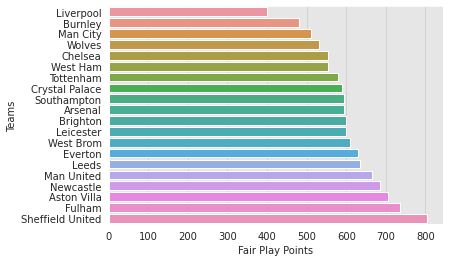

In [ ]:
def create_fair_play_table(df):
    '''Creates a barplot that has fair play points for every team in the league'''
    x1 = df.groupby('HomeTeam')['HBP'].sum().sort_values()                      #First using groupby to get hometeams
    x2 = df.groupby('AwayTeam')['ABP'].sum().sort_values()                      #Then using groupby to get away teams  
    x3 = (x1+x2).sort_values().to_frame().reset_index()                         #Adding the two and sorting them and creating a dataframe of the sorted values  
    x3.columns = ['Teams', 'Fair Play Points']                                  #Changing the column names of the new table  
    df_fp = sns.barplot(x = "Fair Play Points", y = "Teams", data = x3)         #Plotting barplot of the new dataframe  
    print('The champions of the 2020-2021 Fair Play League is {} ' .format(x3['Teams'].iloc[0]))#Print statement stating the champions of the fair play table
    return df_fp
df_fp = create_fair_play_table(df)

## P2.2 - Statistical Analysis 

#### P2.2.1.1 - Variable Selection for Linear Regression 

In **variable selection** ('variable' means the same as 'predictor'), variables get iteratively added or removed from the regression model. Once finished, the model typically contains only a subset of the original variables. It makes it easier to interpret the model, and in some cases it makes it generalise better to new data. 

To perform variable selection, create a function `select_variable(df, main_pred, main_target, alpha)`, where 
 
 - `main_pred` is a dictionary of variables. For this analysis, firstly, either all Home or Away teams will be marked and the predictors given below will be used

  - Home: [Time, FTR, HTHG, HTR, HS, HST, HF, HC, HBP]
  
  - Away: [Time, FTR, HTAG, HTR, AS, AST, AF, AC, ABP]. 
 
 - `main_target` is the variable for the regression, Home: FTHG (or Away: FTAG)
 
 - `alpha` is the significance level for selecting significant predictors

The function should return

 - `main_pred` is the dictionary which stores the selected subset of initial `main_pred` both for home and away teams, in a format of `main_pred = {'Home': [... selected predictors here ...], 'Away': [... selected predictors here ...]}`.

To calculate regression fits and $p$-values you will use `statsmodels`. The general procedure follows two stages:

 - Stage 1 (adding predictors): you build a model by adding variables one after the other. You keep adding variables that increase the **adjusted $R^2$** value (provided by `statsmodels` package). 
  
  - Start with an empty set of variables
  
  - Fit multiple one-variable regression models. In each iteration, use one of the variables provided in predictors. The variable that leads to the largest increase in adjusted $R^2$ is added to the model.
  
  - Now proceed by adding a second variable into the model. Starting from the remaining variables, again choose the variable that leads to the largest increase in adjusted $R^2$.
  
  - Continue in the same way for the third, fourth, … variable.
  
  - You are finished when there is no variable left that increases adjusted $R^2$.
 
 - Stage 2 (removing non-significant predictors): if any of the utilised predictors are not significant, you need to remove them. Keep removing variables until all variables in the model are significant.

  - Start by fitting a model using the variables that have been added to the model in Stage 1.
  
  - If there is a variable that is not significant, remove the variable with the largest $p$-value and fit the model again with the reduced set of variables.
  
  - Keep removing variables and re-fitting the model until all remaining variables are significant.
  
  - The remaining significant variables are the output of your function.

In [ ]:
def select_variable(df, main_pred, main_target, alpha):
    '''Function is used to select variables that are best fit for the target variable FTHG and FTAG'''
    main_pred = {}
    # your code here
    main_targeth = {'Home': ''}                                                           
    main_predh = {}
    homepredlst = ['Time', 'FTR', 'HTHG', 'HTR', 'HS', 'HST', 'HF', 'HC', 'HBP']
    selectedpredh =[]
    for i1 in homepredlst:                                                      #This loop iterates over the predictors for the home predictors list
      x1 = (sm.OLS.from_formula(f'FTHG ~  {i1}', df).fit().rsquared_adj)        #then fits and retrieves each predictors adjusted rsquared to the target FTHG
      d = {i1:x1}                                                               #creates a dictionary d with each predictor and its rsquared value 
      main_predh.update(d)                                                      #Updates the main dictionary main_predh with the key value pair of the current fir

    max_valueh = max(main_predh, key = main_predh.get)                          #retrieves the max adjusted r squared and the predictor responsible for it
    t = (sm.OLS.from_formula(f'FTHG ~  {max_valueh}', df).fit().rsquared_adj)   #checking the max adjusted rsquared for reference later
    selectedpredh.append(max_valueh)                                            #appending a list with this predictor
    homepredlst.remove(max_valueh)                                              #Removing the predictor from the predictors list

    for i1 in homepredlst:                                                      #Iterating over the remaining predictors to check which combination with the first predictor gives highest adjusted rsquared
      var1 = ''.join(str(e) for e in selectedpredh)                             #Combining the selected predictors as a string
      x1 = sm.OLS.from_formula(f'FTHG ~ {i1} + {var1}', df).fit().rsquared_adj  #Checking the adjusted r squared with combined predictors
      d = {i1:x1}                                                               #making a dictionary
      main_predh.update(d)                                                      #updating the main dictionary 

      max_valueh = max(main_predh, key = main_predh.get)                        #retrieving the predictor that leads to max adjusted r squared
      temp = ''.join(str(e) for e in selectedpredh)                             #Checking the combined adjusted r squared value
      t1 = (sm.OLS.from_formula(f'FTHG ~  {max_valueh} + {temp}', df).fit().rsquared_adj)

      if t1>t:                                                                  #Nested loop which will only execute if there's an increase in adjusted rsquared
        try:                                                                    
          selectedpredh.append(max_valueh)                                      #Updating the 2nd list that has all the selected predictors 
          homepredlst.remove(max_valueh)                                        #Deleteing predictors from the main list
        except ValueError:                                                      #using try except if the predictor has already been deleted from the main list
          pass

        for i1 in homepredlst:                                                  #A series of nested for loops that replicated the same tille there is no increase in adjusted R square
          var1 = '+'.join(str(e) for e in selectedpredh)
          x1 = (sm.OLS.from_formula(f'FTHG ~ {i1} + {var1}', df).fit().rsquared_adj)
          d = {i1:x1}
          main_predh.update(d)

          max_valueh = max(main_predh, key = main_predh.get)
          temp = '+'.join(str(e) for e in selectedpredh)
          t2 = sm.OLS.from_formula(f'FTHG ~ {max_valueh} + {temp}', df).fit().rsquared_adj

          if t2>t1:
            try:
              selectedpredh.append(max_valueh)
              homepredlst.remove(max_valueh)
            except ValueError:
              pass 

          for i1 in homepredlst:
            var1 = '+'.join(str(e) for e in selectedpredh)
            x1 = (sm.OLS.from_formula(f'FTHG ~ {i1} + {var1}', df).fit().rsquared_adj)
            d = {i1:x1}
            main_predh.update(d)

            max_valueh = max(main_predh, key = main_predh.get)
            temp = '+'.join(str(e) for e in selectedpredh)
            t3 = sm.OLS.from_formula(f'FTHG ~ {max_valueh} + {temp}', df).fit().rsquared_adj

            if t3>t2:
              try:
                selectedpredh.append(max_valueh)
                homepredlst.remove(max_valueh)
              except ValueError:
                pass

              for i1 in homepredlst:
                var1 = '+'.join(str(e) for e in selectedpredh)
                x1 = (sm.OLS.from_formula(f'FTHG ~ {i1} + {var1}', df).fit().rsquared_adj)
                d = {i1:x1}
                main_predh.update(d)

                max_valueh = max(main_predh, key = main_predh.get)
                temp = '+'.join(str(e) for e in selectedpredh)
                t4 = sm.OLS.from_formula(f'FTHG ~ {max_valueh} + {temp}', df).fit().rsquared_adj

                if t4>t3:
                  try:
                    selectedpredh.append(max_valueh)
                    homepredlst.remove(max_valueh)
                  except ValueError:
                    pass

                  for i1 in homepredlst:
                    var1 = '+'.join(str(e) for e in selectedpredh)
                    x1 = (sm.OLS.from_formula(f'FTHG ~ {i1} + {var1}', df).fit().rsquared_adj)
                    d = {i1:x1}
                    main_predh.update(d)

                    max_valueh = max(main_predh, key = main_predh.get)
                    temp = '+'.join(str(e) for e in selectedpredh)
                    t5 = sm.OLS.from_formula(f'FTHG ~ {max_valueh} + {temp}', df).fit().rsquared_adj
                
                    if t5>t4:
                      try:
                        selectedpredh.append(max_valueh)
                        homepredlst.remove(max_valueh)
                      except ValueError:
                        pass

                      for i1 in homepredlst:
                        var1 = '+'.join(str(e) for e in selectedpredh)
                        x1 = (sm.OLS.from_formula(f'FTHG ~ {i1} + {var1}', df).fit().rsquared_adj)
                        d = {i1:x1}
                        main_predh.update(d)

                        max_valueh = max(main_predh, key = main_predh.get)
                        temp = '+'.join(str(e) for e in selectedpredh)
                        t6 = sm.OLS.from_formula(f'FTHG ~ {max_valueh} + {temp}', df).fit().rsquared_adj

                        if t6>t5:
                          try:
                            selectedpredh.append(max_valueh)
                            homepredlst.remove(max_valueh)
                          except ValueError:
                            pass

                          for i1 in homepredlst:
                            var1 = '+'.join(str(e) for e in selectedpredh)
                            x1 = (sm.OLS.from_formula(f'FTHG ~ {i1} + {var1}', df).fit().rsquared_adj)
                            d = {i1:x1}
                            main_predh.update(d)

                            max_valueh = max(main_predh, key = main_predh.get)
                            temp = '+'.join(str(e) for e in selectedpredh)
                            t7 = sm.OLS.from_formula(f'FTHG ~ {max_valueh} + {temp}', df).fit().rsquared_adj

                            if t7>t6:
                              try:
                                selectedpredh.append(max_valueh)
                                homepredlst.remove(max_valueh)
                              except ValueError:
                                pass

                              for i1 in homepredlst:
                                var1 = '+'.join(str(e) for e in selectedpredh)
                                x1 = (sm.OLS.from_formula(f'FTHG ~ {i1} + {var1}', df).fit().rsquared_adj)
                                d = {i1:x1}
                                main_predh.update(d)

                                max_valueh = max(main_predh, key = main_predh.get)
                                temp = '+'.join(str(e) for e in selectedpredh)
                                t8 = sm.OLS.from_formula(f'FTHG ~ {max_valueh} + {temp}', df).fit().rsquared_adj

                                if t8>t7:
                                  try:
                                    selectedpredh.append(max_valueh)
                                    homepredlst.remove(max_valueh)   
                                  except ValueError:
                                    pass                           

    Selectedhomepreds = list(set(selectedpredh))

                     
    main_targeta = {'Away' : ''}                                                
    main_preda = {}
    awaypredlst = ['Time', 'FTR', 'HTAG', 'HTR', 'AS', 'AST', 'AF', 'AC', 'ABP']
    selectedpreda = []
    for i2 in awaypredlst:                                                      #Loop to iterate over the awaypredlist and find the predictor that leads to maximum increase in adjusted rsquare
      x2 = (sm.OLS.from_formula(f'FTAG ~  {i2}', df).fit().rsquared_adj)        #By fitting all the predictors to the target FTAG
      d = {i2:x2}                                                               #Put all the predictors and adjusted_rsquare onto a temporary dictionary d
      main_preda.update(d)                                                      #Update the main dictionary maind_preda with the predictor and adj_rsquared key value pairs 

    max_valuea = max(main_preda, key = main_preda.get)                          #Get the pred with the highest adj_rquared value
    p = sm.OLS.from_formula(f'FTAG ~  {max_valuea}', df).fit().rsquared_adj     #Fit this value to get a reference for the rsquare value
    selectedpreda.append(max_valuea)                                            #Append this predictor to a list that holds all the selected predictors
    awaypredlst.remove(max_valuea)                                              #Remove this predictor from the main list

    for i2 in awaypredlst:                                                      #Iterate over the main lista again
      var2 = ''.join(str(r) for r in selectedpreda)                             #Join all the predictors in the selected list with the remaining predictors in the main list
      x2 = sm.OLS.from_formula(f'FTAG ~ {i2} + {var2}', df).fit().rsquared_adj  #to see which predictor increases the r_squared by the most
      d = {i2:x2}                                                               #update the temporary dictionary again  
      main_preda.update(d)                                                      #While also updating the main dictionary

    max_valuea = max(main_preda, key = main_preda.get)                          #get the predictor, which when combined with the previous predictor results in the highest increase of adj r_squared 
    temp = ''.join(str(r) for r in selectedpreda)                               #Get the rSquared value for this as a reference
    p1 = sm.OLS.from_formula(f'FTAG ~ {max_valuea} + {temp}', df).fit().rsquared_adj#By fitting the selected predictor


    if p1>p:                                                                    #If the second predictor increases the rsquared then continue to repeat the same process
        try:                                                                    #else stop execution
          selectedpreda.append(max_valuea)
          awaypredlst.remove(max_valuea)
        except ValueError:
          pass
        for i2 in awaypredlst:
            var2 = '+'.join(str(r) for r in selectedpreda)
            x2 = (sm.OLS.from_formula(f'FTAG ~ {i2} + {var2}', df).fit().rsquared_adj)
            d = {i2:x2}
            main_preda.update(d)

            max_valuea = max(main_preda, key = main_preda.get)
            temp = '+'.join(str(r) for r in selectedpreda)
            p2 = sm.OLS.from_formula(f'FTAG ~ {max_valuea} + {temp}', df).fit().rsquared_adj
  
            if p2>p1:
              try:
                selectedpreda.append(max_valuea)
                awaypredlst.remove(max_valuea)
              except ValueError:
                pass

              for i2 in awaypredlst:
                var2 = '+'.join(str(r) for r in selectedpreda)
                x2 = (sm.OLS.from_formula(f'FTAG ~ {i2} + {var2}', df).fit().rsquared_adj)
                d = {i2:x2}
                main_preda.update(d)

                max_valuea = max(main_preda, key = main_preda.get)
                temp = '+'.join(str(r) for r in selectedpreda)
                p3 = sm.OLS.from_formula(f'FTAG ~ {max_valuea} + {temp}', df).fit().rsquared_adj

              if p3>p2:
                try:
                  selectedpreda.append(max_valuea)
                  awaypredlst.remove(max_valuea)
                except ValueError:
                  pass

              for i2 in awaypredlst:
                var2 = '+'.join(str(r) for r in selectedpreda)
                x2 = (sm.OLS.from_formula(f'FTAG ~ {i2} + {var2}', df).fit().rsquared_adj)
                d = {i2:x2}
                main_preda.update(d)

                max_valuea = max(main_preda, key = main_preda.get)
                temp = '+'.join(str(r) for r in selectedpreda)
                p4 = sm.OLS.from_formula(f'FTAG ~ {max_valuea} + {temp}', df).fit().rsquared_adj

              if p4>p3:
                try:
                  selectedpreda.append(max_valuea)
                  awaypredlst.remove(max_valuea)
                except ValueError:
                  pass

                for i2 in awaypredlst:
                  var2 = '+'.join(str(r) for r in selectedpreda)
                  x2 = (sm.OLS.from_formula(f'FTAG ~ {i2} + {var2}', df).fit().rsquared_adj)
                  d = {i2:x2}
                  main_preda.update(d)

                  max_valuea = max(main_preda, key = main_preda.get)
                  temp = '+'.join(str(r) for r in selectedpreda)
                  p5 = sm.OLS.from_formula(f'FTAG ~ {max_valuea} + {temp}', df).fit().rsquared_adj

                  if p5>p4:
                    try:
                        selectedpreda.append(max_valuea)
                        awaypredlst.remove(max_valuea)
                    except ValueError:
                        pass

                    for i2 in awaypredlst:
                      var2 = '+'.join(str(r) for r in selectedpreda)
                      x2 = (sm.OLS.from_formula(f'FTAG ~ {i2} + {var2}', df).fit().rsquared_adj)
                      d = {i2:x2}
                      main_preda.update(d)

                      max_valuea = max(main_preda, key = main_preda.get)
                      temp = '+'.join(str(r) for r in selectedpreda)
                      p6 = sm.OLS.from_formula(f'FTAG ~ {max_valuea} + {temp}', df).fit().rsquared_adj
                                
                      if p6>p5:
                        try:
                            selectedpreda.append(max_valuea)
                            awaypredlst.remove(max_valuea)
                        except ValueError:
                            pass
                        for i2 in awaypredlst:
                          var2 = '+'.join(str(r) for r in selectedpreda)
                          x2 = (sm.OLS.from_formula(f'FTAG ~ {i2} + {var2}', df).fit().rsquared_adj)
                          d = {i2:x2}
                          main_preda.update(d)

                          max_valuea = max(main_preda, key = main_preda.get)
                          temp = '+'.join(str(r) for r in selectedpreda)
                          p7 = sm.OLS.from_formula(f'FTAG ~ {max_valuea} + {temp}', df).fit().rsquared_adj
                             
                          if p7>p6:
                            selectedpreda.append(max_valuea)
                            awaypredlst.remove(max_valuea)

                            for i2 in awaypredlst:
                              var2 = '+'.join(str(r) for r in selectedpreda)
                              x2 = (sm.OLS.from_formula(f'FTAG ~ {i2} + {var2}', df).fit().rsquared_adj)
                              d = {i2:x2}
                              main_preda.update(d)

                              max_valuea = max(main_preda, key = main_preda.get)
                              temp = '+'.join(str(r) for r in selectedpreda)
                              p8 = sm.OLS.from_formula(f'FTAG ~ {max_valuea}+{temp}', df).fit().rsquared_adj

                              if p8>p7:
                                selectedpreda.append(max_valuea)
                                awaypredlst.remove(max_valuea)
    Selectedawaypreds = list(set(selectedpreda))
    
    ## Stage 2
                                                                                #Now that we have the selected predictors for both home and away teams, we now move onto
                                                                                #Checking if the predictors are significance or not
    for i in Selectedhomepreds:                                                 
      h = '+'.join(str(q) for q in Selectedhomepreds)
      home = sm.OLS.from_formula(f'FTHG ~ {h}',df).fit().pvalues                #Iterating over the selected predictors to retrieve their p values
      home_df = home.to_frame(name = 'p-values').reset_index()                  #Making a dataframe out of the p values 
      s = home_df['p-values'].max()                                             #Retrieving the maximum p value in the dataframe  
      if s > alpha:                                                             #If the p value is greater than the significance level alpha
        t = home_df['p-values'].idxmax()
        t1 = home_df.iloc[t]
        home_df.drop(home_df['p-values'].idxmax(), inplace = True)              #Drop the p value form the dataframe
        if t1[0] in ['Time[T.20:15]','Time[T.13:30]', 'Time[T.12.30]']:         #As there are many time periods, if the time predictor becomes insignificant, then drop time
          Selectedhomepreds.remove('Time')
        else:
          try:
            Selectedhomepreds.remove(t1[0])                                     #This loop keeps removing predictors till the intercept becomes insignificant
          except ValueError:
            pass



    for j in Selectedawaypreds:                                                 #Replicating the process of removing significant predictors for the away team 
        a = '+'.join(str(o) for o in Selectedawaypreds)
        away = sm.OLS.from_formula(f'FTAG ~ {a}', df).fit().pvalues
        away_df = away.to_frame(name = 'p-values').reset_index()
        l = away_df['p-values'].max()
        if l > alpha:
          k = away_df['p-values'].idxmax()
          k1 = away_df.iloc[k]
          away_df.drop(away_df['p-values'].idxmax(), inplace = True)
          if k1[0] in ['Time[T.17:45]']:
            Selectedawaypreds.remove('Time')
          else:
            try:
              Selectedawaypreds.remove(k1[0])
            except ValueError:
                pass
    main_pred = {}
    main_pred["Home"] = Selectedhomepreds
    main_pred["Away"] = Selectedawaypreds
    return main_pred

In [ ]:
main_pred = {}                                                                  #Instantiating an empty main_pred and main_target is necessary
main_target = {}
alpha = 0.05
select_variable(df, main_pred, main_target, alpha)

{'Away': ['AS', 'HTR', 'HTAG', 'AF', 'AST', 'FTR'],
 'Home': ['HTR', 'FTR', 'HTHG', 'HST', 'HC']}

#### P2.2.3 - Maximum likelihood estimation (MLE) and prediction 

In this question, you are expected to solve a regression problem, but this time using **maximum likelihood estimation (MLE)** theory. You need to construct a regression analysis to investigate how well the **full time results (FTR)** can be predicted from the other variables of FTHG, HS, HC, AS, AC. 

#### P2.2.3.1 - ML Estimate of regression parameters 

Create a function `ML_estimate(df_est, pred, target)` which calculates the ordinary least squares (OLS) and two MLE fits (Poisson and Probit) for the given arguments.

You need to use `statsmodels` module and its corresponding methods of `.OLS()`, `.Poisson()` and `.Probit()`.

- `df_est` is a subset of the data frame `df` which includes **randomly selected** 280 rows of `df`. The remaining 100 rows will be used in prediction application (see below).

- `pred` is a list of variables. For this analysis, OLS and other models utilise the predictors of FTHG, HS, HC, AS, AC. (Note: Depending on your implementation, you might need to add a constant to the predictors. Please see the lecture notes)

- `target` is the target variable for the regression, FTR. You need to adjust values of this column for the purpose of this question. 
 
  - FTR = 1.0 if Home team wins.
  
  - FTR = 0.0 if Away team wins or a Draw.

The function should return variables 

 - `MLE_model_fits` a `tuple` object which stores all three model fits `statsmodels` objects for OLS, Probit and Poisson.

In [ ]:
df_est = df.loc[:, ['FTHG', 'HS', 'HC', 'AS', 'AC', 'FTR']].dropna()            #Selecting the predictors for fitting the model

row, col = df_est.shape                                                         #gettting the rows and columns value of the selected predictors

test_idx = np.random.choice(row, 100, replace = False)                          #Selecting 100 rows randomly as the testing set
train_idx = np.setdiff1d(np.arange(row), test_idx, assume_unique= True)         #Because we selected 100 rows as test set, the remaining 280 rows will be used for training

df_est['const'] = 1                                                             #Adding a constant column 

pred = df_est.iloc[train_idx][['FTHG', 'HS', 'HC', 'AS', 'AC']].dropna()        #Selecting the training set for the predictors
target = df_est.iloc[train_idx]['FTR'].dropna()                                 #Selecting the training set for the target    
target[target<0]=0                                                              #Assigning 1 for Home wins and 0 for the remaining

df_pred = df_est.iloc[test_idx][['FTHG', 'HS', 'HC', 'AS', 'AC']].dropna()      #Selecting the testing set for the predictors
def ML_estimate(df_est, pred, target):                                          #Function to fit the models
    '''Function used to fit OLS, Probit and Poisson models'''
    # your code here
    sm_ols = sm.OLS(target, pred).fit()                                         #Fitting the OLS model
    sm_probit = sm.Probit(target, pred).fit()                                   #Fitting the probit model
    sm_pois = sm.Poisson(target, pred).fit()                                    #Fitting the Poisson model
    MLE_model_fits = (sm_ols, sm_probit, sm_pois)                               #Creating a tuple of the fits
    return MLE_model_fits

#### P2.2.3.2 - Predicting Home Win via MLE 

Create a function `ML_predict(df_pred, MLE_model_fits)` which calculates FTR predictions for all three models of OLS, Probit and Poisson.

You need to use `statsmodels`' method for prediction: `.predict()`.

- `df_pred` is a subset of the data frame `df` which includes only a subset of 100 rows of `df`.

- `MLE_model_fits` is a `tuple` object obtained from the `ML_estimate()` function above. Unpack this argument to obtain `statsmodels` objects for all three models. 

This function should return: 

 - `df_pred`

 - `MLE_model_predictions` is a `tuple` which stores the predicted outputs for each three models.  

In [ ]:
t = ML_estimate(df_est, pred, target)                                           #Running the previous ML_estimated method
MLE_model_fits = t[0], t[1], t[2]                                               #Unpacking the tuples from the previous method
def ML_predict(df_pred, MLE_model_fits):                                        #Creting a prediction function
    '''Function used to predict using the fitted models'''  
    # your code here
    pred_ols = t[0].predict(df_pred)                                            #Prediction for the OLS model
    pred_probit = t[1].predict(df_pred)                                         #Prediction for the Probit model
    pred_pois = t[2].predict(df_pred)                                           #Prediction for the poisson model  
    MLE_model_predictions = pred_ols, pred_probit, pred_pois                    #Creating a tuple for the predictions
    return MLE_model_predictions

Optimization terminated successfully.
         Current function value: 0.349121
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.658834
         Iterations 6


#### P2.2.4 - Evaluating Prediction Performance

You will now need to visualise the prediction performance of the models, and evaluate them in terms of prediction accuracy, and mean square error (MSE) metrics. For this purpose, create a function `prediction_perf(gt, MLE_model_predictions)` which evaluates the prediction performance of the reference models. Up to this point, you should have obtained

 - $N = 100$ samples of predictions from each model, stored in `MLE_model_predictions`.
 
 - The ground-truth FTR values from data frames `df`, stored in `gt`.

Assume predicted values for a given model are stored in a variable $P$ and its average is $\bar{P}$. The first performance measure will be the MSE, and will be calculated for each model from the expression below:

$$ MSE = \dfrac{1}{N}\sum_{i=0}^{N-1} (P_i - FTR_i)^2$$

In order to obtain the prediction accuracy for each model, you first should convert continuous prediction results into the binary form (either 1.0 or 0.0). The binarisation process will follow the piecewise function below:

  $$P_{binary, i} = \begin{cases} 1.0, & P_i \geq \bar{P}\\ 0.0, & \text{otherwise}  \end{cases} \quad \text{where} \quad i = 0, 1, \dots, 99$$

Then the percentage accuracy, $Acc\%$ is calculated as

$$ Acc\% = 100 - \sum_{i=0}^{99} |P_{binary, i} - FTR_i|$$

Following these, by using `sklearn` module methods `roc_curve()` and `auc()` find ROC curve parameters and AUC metric for each prediction model. 

In order to obtain performance analysis results in a neatly way, you then need to create a new `pandas` dataframe `df_results` which will be in the form of

```
+----+-------------+--------+--------+-------+
|    | Model       |   Acc% |    MSE |   AUC |
+====+=============+========+========+=======+
|  0 | OLS         |  77.00 | 0.1260 | 0.911 |
+----+-------------+--------+--------+-------+
|  1 | MLE-Probit  |  81.00 | 0.1086 | 0.911 |
+----+-------------+--------+--------+-------+
|  2 | MLE-Poisson |  76.00 | 0.1490 | 0.884 |
+----+-------------+--------+--------+-------+
```

Consequently, using `sklearn` method `RocCurveDisplay()`, the `prediction_perf()` function should 

 - `print` and `return` the data frame `df_results`.

**Marking for this question**
 - (2 marks) Calculating MSE and $Acc\%$ metrics correctly.
 - (3 marks) Creating and returning dataframe `df_results`.
 
with a condition that all these three operations are performed in a **fully working `prediction_perf()` function**.

In [ ]:
from sklearn.metrics import roc_curve                                           #Importing roc_curve library
from sklearn.metrics import roc_auc_score
gt = df_est.FTR.iloc[test_idx]                                                  #Selecting the ground truth of the target for verification
gt[gt<0]=0                                                                      #Making sure the ground truth also mathes the fitted models
t1 = ML_predict(df_pred, MLE_model_fits)                                        #Running the ML_predict method
MLE_model_predictions = t1[0], t1[1], t1[2]                                     #Unpacking the tuple from the ML_predict method
def prediction_perf(gt, MLE_model_predictions):                                 #Defining the prediction_perf method
    '''Function used to return a dataframe that contains the accuracy, MSE and AUC score of the fitted models '''
    # your code here
    MSE_ols = np.round(np.mean((t1[0]-gt)**2), 4)                               #Mean squared error for ols model
    MSE_probit = np.round(np.mean((t1[1]-gt)**2), 4)                            #Mean squared error for probit model
    MSE_pois = np.round(np.mean((t1[2]-gt)**2), 4)                              #Mean squared error for poisson model
    pred_olsb = (t1[0] >= np.mean(t1[0])).astype("int")                         #Binarisation of the results for all 3 models
    pred_probitb = (t1[1] >= np.mean(t1[1])).astype("int")
    pred_poisb = (t1[2] >= np.mean(t1[2])).astype("int")
    ao = np.round(100*accuracy_score(y_true = gt, y_pred = pred_olsb), 2)       #Accuracy score for ols model
    aprob = np.round(100*accuracy_score(y_true = gt, y_pred = pred_probitb), 2) #Accuracy score for probit model
    apois = np.round(100*accuracy_score(y_true = gt, y_pred = pred_poisb), 2)   #Accuracy score for poisson model
    auco = roc_auc_score(gt, pred_olsb)                                         #Auc score for OLS model
    aucprob = roc_auc_score( gt, pred_probitb)                                  #Auc score for  probit model
    aucpois = roc_auc_score(gt, pred_poisb)                                     #Auc score for poisson model
    dftemp = {'Model':['OLS', 'MLS_probit', 'MLS-pois'],'Acc%':[ao, aprob, apois], 'MSE' : [MSE_ols, MSE_probit, MSE_pois], 'AUC' : [auco, aucprob, aucpois]}#Dictionary which will later be converted to dataframe
    df_results = pd.DataFrame(data = dftemp)                                    #Converting dictionary to dataframe
    return df_results

In [ ]:
t2 = prediction_perf(gt, MLE_model_predictions)
t2

,Model,Acc%,MSE,AUC
0,OLS,80.0,0.1235,0.819780
1,MLS_probit,81.0,0.1223,0.807692
2,MLS-pois,73.0,0.1697,0.713187
